# Task 3 - Decision tree and random forest

## Импорт необходимых модулей

In [1]:
import numpy as np
import sklearn
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Загрузка наших данных (усеченные данные - первые 1000 строк из первоначальных данных)

In [2]:
data = pd.read_csv("adult_cut_1000.csv", sep=';')

## Определяем таблицу из столбцов, участвующих в обучении. Также приводим к типу int наши целевые классы 

In [3]:
work_data = data[['Age', ' fnlwgt', ' education_num', ' capital-gain', ' capital-loss', ' hours-per-week', ' classes']]


work_data[' classes'] = (work_data[' classes'] == " <=50K").astype('int64')


<ipython-input-3-9437083652f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_data[' classes'] = (work_data[' classes'] == " <=50K").astype('int64')


## Разбивка данных по признакам (X) и классам (y)

In [4]:
X = work_data.drop([' classes'], axis=1)
y = work_data[' classes']

## Разбивка на обучающую (train) и тестовые (test) данные

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train_my_tree, X_test_my_tree = X_train.to_numpy(), X_test.to_numpy()
y_train_my_tree, y_test_my_tree = y_train.to_numpy(), y_test.to_numpy()

## Определение моего решающего дерева

In [6]:
from decision_tree import MyDecisionTree

my_dec_tree = MyDecisionTree(max_deep=6, min_size=18)
root_train = my_dec_tree.fit_data(X_train_my_tree, y_train_my_tree)


In [7]:
predictions = my_dec_tree.predict_data(X_test_my_tree)
accuracy = np.sum(predictions == y_test_my_tree) / len(predictions)

print("accuracy_my_tree = ", accuracy)

accuracy_my_tree =  0.8212121212121212


## Определение Decision tree с помощью sklearn.tree: обучение и тестирование

In [8]:
tree_from_sklearn = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)
tree_from_sklearn.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [9]:
predict = tree_from_sklearn.predict(X_test)
accuracy = sum(predict == y_test) / len(predict)

print("accuracy_sklearn_tree = ", accuracy)

accuracy_sklearn_tree =  0.8181818181818182


## Случайное дерево (random forest) и оценка OOB

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='gini', random_state=42)


## Обучение и тестирование

In [11]:
rf.fit(X_train, y_train)
predict_rf = rf.predict(X_test)
accuracy = sum(predict_rf == y_test) / len(predict)

print('accuracy_sklearn_rf = ', accuracy)

accuracy_sklearn_rf =  0.8242424242424242


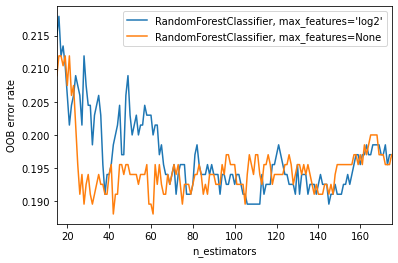

In [12]:
from collections import OrderedDict
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

ensemble_clfs = [
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, random_state=42)) ]


error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()